<a href="https://colab.research.google.com/github/aaolcay/Traditional-Machine-Learning-Techniques/blob/main/L_Layer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**L-Layer Deep Neural Network**
In the previous notebooks, we implemented logistic regression and a multi-layer perceptron neural network for binary classification. Logistic regression has only one layer, which is the output layer, and one perceptron. In this notebook, we will introduce the L-Layer Neural Network algorithm, which is a generalized version of the multi-layer NN models. We aim to simplify machine/deep learning topics for beginners to understand, while still providing enough information for them to build a solid foundation. For those who want to delve deeper into the subject, we recommend taking courses such as those offered on:
- [Coursera](https://www.coursera.org/learn/neural-networks-deep-learning)
- [YouTube](https://www.youtube.com/watch?v=Gv9_4yMHFhI&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF)

We believe that AI is advancing at a rapid pace and that young scientists are making significant contributions to the field. We believe that simplifying concepts can help students better understand the mathematical concepts behind algorithms and may even reduce CO2 emissions by reducing the power used by computers. While online education has its drawbacks, it has proven to be effective during the Covid-19 pandemic. Quality content is crucial in online education, and practical exercises are often left to the student. Our code sharing aims to address this need by providing practical exercises to accompany the theoretical concepts.

It is important to acknowledge that the structure of this notebook is based on an exercise from Andrew Ng's course on [Coursera](https://www.coursera.org/learn/neural-networks-deep-learning), which has provided many students with valuable insights into the field of AI. We are grateful to him for his contribution to the field and for making this knowledge accessible to a wider audience.

Please, contact me [Abdullah A. Olcay](https://www.linkedin.com/in/abdullah-azzam-olcay-613453183/) for any question, suggestion and view.

#### **Forward Propagation**

We start with forward propagation to compute cost function. The equations for calculating the cost function are given below in the forward propagation step.

$$Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} \tag{1}$$
$$A^{[l]} = g^{[l]}(Z^{[l]}) \tag{2}$$

The cost function (with the log-loss function) is then calculated as below: 

\begin{equation} \tag{3}
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)\right)
\end{equation}


In [253]:
# P-----------------------------------------------------------------------------
# --L---------------------------------------------------------------------------
# ---E--------------------------------------------------------------------------
# ----A-------------------------------------------------------------------------
# -----S------------------------------------------------------------------------
# ------E-----------------------------------------------------------------------
# -------  ---------------------------------------------------------------------
# --------R---------------------------------------------------------------------
# ---------E--------------------------------------------------------------------
# ----------F-------------------------------------------------------------------
# -----------E------------------------------------------------------------------
# ------------R-----------------------------------------------------------------
import random
import numpy as np
# -------------  ---------------------------------------------------------------
# --------------T---------------------------------------------------------------
# ---------------O--------------------------------------------------------------
# ----------------  ------------------------------------------------------------
# -----------------A------------------------------------------------------------
# ------------------B-----------------------------------------------------------
# -------------------D----------------------------------------------------------
# --------------------U---------------------------------------------------------
# ---------------------L--------------------------------------------------------
# ----------------------L-------------------------------------------------------
# -----------------------A------------------------------------------------------
# ------------------------H-----------------------------------------------------
# -------------------------  ---------------------------------------------------
# --------------------------O---------------------------------------------------
# ---------------------------L--------------------------------------------------
# ----------------------------C-------------------------------------------------
# -----------------------------A------------------------------------------------
# ------------------------------Y-----------------------------------------------

In [254]:
def initialize_parameters_deep(X, layer_dims=[3, 5, 4, 3, 1]):
    # Initialize parameters for a deep neural network with given layer dimensions
    # layer_dims: list containing the number of units in each layer (including input and output layers)
    #     layer_dims[0]: number of input features
    #     layer_dims[-1]: number of output units
    #     L: number of layers (excluding input layer)
    # Returns a dictionary of randomly initialized weight and bias parameters for each layer
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        # Initialize weight matrix of shape (num_units in current layer, num_units in previous layer)
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        # Initialize bias vector of shape (num_units in current layer, 1)
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [255]:
def forward_prop(X, Y, parameters):
    # Compute forward propagation for a deep neural network with given input X, target Y, and parameters
    # parameters: dictionary of weight and bias parameters for each layer
    # Returns the cost, output activations, and a list of cache tuples for each layer
    
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers (excluding input layer)
    m = X.shape[1]  # number of examples
    # Compute forward propagation up to the output layer (excluding output layer)
    for l in range(1, L):
        A_prev = A
        # Compute linear transformation
        linear_cache = (A_prev, parameters["W" + str(l)], parameters["b" + str(l)])
        W = linear_cache[1]
        b = linear_cache[2]
        Z = np.dot(W, A_prev) + b
        # Apply activation function
        A = np.maximum(0, Z)  # ReLU activation function
        # Cache results for later use in backpropagation
        activation_cache = Z
        cache = (linear_cache, activation_cache)
        caches.append(cache)

    # Compute forward propagation for output layer
    linear_cache = (A, parameters["W" + str(L)], parameters["b" + str(L)])
    W = linear_cache[1]
    b = linear_cache[2]
    Z = np.dot(W, A) + b
    A_output = 1 / (1 + np.exp(-Z))  # Sigmoid activation function
    # Cache results for later use in backpropagation
    activation_cache = Z
    cache = (linear_cache, activation_cache)
    caches.append(cache)

    # Compute cost function
    cost = -(1 / m) * np.sum(Y * np.log(A_output) + (1 - Y) * np.log(1 - A_output))

    return cost, A_output, caches

#### **Backward (Back)Propagation**
Backpropagation is a fundamental algorithm in training neural networks. It calculates the gradients of the cost function with respect to the parameters of the network, so that the parameters can be updated in the opposite direction of the gradient to minimize the cost function.

$$dZ^{[l]} = dA^{[l]} \odot g'^{[l]}(Z^{[l]}) \tag{4} $$

$$dW^{[l]} = \frac{1}{m}A^{[l-1]T}dZ^{[l]} \tag{5} $$

$$db^{[l]} = \frac{1}{m}\sum_{i=1}^mdZ^{[l]} \tag{6} $$

$$dA^{[l]} = dZ^{[l+1]}W^{[l+1]T} \tag{7} $$

where $dZ^{[l]}$ and $dA^{[l]}$ represent the derivative of the pre-activation and activation outputs for layer $l$, $g'^{[l]}$ represents the derivative of the activation function for layer $l$, $dW^{[l]}$ and $db^{[l]}$ represent the gradients for the weight matrix and bias vector for layer $l$, $m$ represents the number of examples in the training set, and $\odot$ represents the element-wise multiplication.

- The equation $dA^{[l]} = dZ^{[l+1]}W^{[l+1]T}$ represents the derivative of the cost with respect to the activation output of layer $l$. The derivative is computed by multiplying the derivative of the cost with respect to the pre-activation output of the next layer ($dZ^{[l+1]}$) with the weight matrix of the next layer ($W^{[l+1]}$) and transposing it.

- The equation $dZ^{[l]} = dA^{[l]} \odot g'^{[l]}(Z^{[l]})$ represents the derivative of the cost with respect to the pre-activation output of layer $l$. The derivative is computed by multiplying the derivative of the cost with respect to the activation output of layer $l$ ($dA^{[l]}$) with the derivative of the activation function of layer $l$ with respect to its pre-activation output ($g'^{[l]}(Z^{[l]})$) element-wise.

- The equation $dW^{[l]} = \frac{1}{m}A^{[l-1]T}dZ^{[l]}$ represents the derivative of the cost with respect to the weight matrix of layer $l$. The derivative is computed by multiplying the activation output of the previous layer ($A^{[l-1]}$) with the derivative of the cost with respect to the pre-activation output of layer $l$ ($dZ^{[l]}$) and taking the average over the training examples.

- The equation $db^{[l]} = \frac{1}{m}\sum_{i=1}^mdZ^{[l]}$ represents the derivative of the cost with respect to the bias vector of layer $l$. The derivative is computed by taking the average of the derivative of the cost with respect to the pre-activation output of layer $l$ over the training examples.


When $l=L$, we are dealing with the output layer of the neural network. In this case, we do not need to compute the derivative of the activation function because there are no more layers after this one. Instead, we directly calculate the derivative of the cost function with respect to the output of the neural network.

Let $J$ be the cost function of the neural network and $y$ be the true labels of the training examples. Then the derivative of the cost function with respect to the output of the network ($a^{[L]}$) is given by:

$$ dA^{[L]} = \frac{\partial J}{\partial a^{[L]}} = \frac{\partial}{\partial a^{[L]}} \left(\frac{1}{m} \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) \right) \tag{8} $$

where $\hat{y}^{(i)}$ is the predicted output of the network for the $i$-th training example, and $L$ is the chosen loss function (e.g., cross-entropy loss). For the sigmoid function, that is, we use in the output layer, equation turns out:
$$dA^{[L]} =-\frac{1}{m} \sum\limits_{i = 1}^{m} (\frac{y^{(i)}}{a^{[L] (i)}} - \frac{(1-y^{(i)})} {(1-a^{[L] (i)})}) \tag{9}$$

For the steps of obtaining (9), please see Appendix A.


In [258]:
def backward_prop(A_output, Y, caches, learning_rate, params):
  L = len(caches)
  m = A_output.shape[1]
  Y = Y.reshape(A_output.shape)
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  ######################## Initializing Backpropagation ########################
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  # dLoss/dA^[L] -> dA^[L] = (Y/A^[L])-((1-Y)/(1-A^[L]))
  dA_output = -(np.divide(Y, A_output) - np.divide(1-Y, 1-A_output)) # dA^[L]
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  # dLoss/dA^[l] for l=L-1
  grads = {}
  current_cache = caches[L-1]
  linear_cache, activation_cache = current_cache
  Z = activation_cache
  # As we use sigmoid in the output layer
  s = 1/(1+np.exp(-Z))
  dZ = dA_output*s*(1-s)
  A_prev, W, b = linear_cache  
  dA_prev = np.dot(W.T, dZ)
  dW_prev = (1/m)*np.dot(dZ, A_prev.T)
  db_prev = (1/m)*np.sum(dZ, axis=1, keepdims=True)
  # Save all of these gradients
  grads["dA"+str(L-1)] = dA_prev # dA^[L-1]
  grads["dW"+str(L)] = dW_prev
  grads["db"+str(L)] = db_prev
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  # dLoss/dA^[l] from l=0 to l=L-1 (not included)
  for l in reversed(range(L-1)):
    current_cache = caches[l]
    linear_cache, activation_cache = current_cache
    Z = activation_cache
    dZ = np.array(grads["dA"+str(l+1)], copy=True)
    dZ[Z<=0] = 0
    A_prev, W, b = linear_cache  
    dA_prev = np.dot(W.T, dZ)
    dW_prev = (1/m)*np.dot(dZ, A_prev.T)
    db_prev = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    grads["dA"+str(l)] = dA_prev 
    grads["dW"+str(l+1)] = dW_prev
    grads["db"+str(l+1)] = db_prev
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  ############################# Update Parameters ##############################
  # ----------------------------------------------------------------------------
  # ----------------------------------------------------------------------------
  parameters = params.copy()
  for l in range(L):
    parameters["W"+str(l+1)] = params["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
    parameters["b"+str(l+1)] = params["b"+str(l+1)] - learning_rate*grads["db"+str(l+1)]

  return parameters

In [259]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0001, num_iterations = 5000, print_cost=False):
    """
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    cost -- cost values computed in forward propagation for each iteration
    """

    np.random.seed(1)
    costs = [] # Save the costs
    
    parameters = initialize_parameters_deep(X, layers_dims)
    
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        cost, A_output, caches = forward_prop(X, Y, parameters)
        
        # Backward propagation.
        parameters = backward_prop(A_output, Y, caches, learning_rate, parameters)
         
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    
    return parameters, costs

### **Load Data**
We use the same data that we used in our previous [tutorial](https://github.com/aaolcay/Traditional-Machine-Learning-Techniques/blob/main/Logistic_regression.ipynb). This data includes dog and cat images.

In [260]:
import os

In [261]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [262]:
# Install kaggle python library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [263]:
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/Logistic Regression as a Neural Network/Data'

In [264]:
# changing the working directory
%cd '/gdrive/MyDrive/Logistic Regression as a Neural Network/Data'

/gdrive/MyDrive/Logistic Regression as a Neural Network/Data


In [265]:
# checking the current working directory
!pwd

/gdrive/MyDrive/Logistic Regression as a Neural Network/Data


In [266]:
!kaggle datasets download -d chetankv/dogs-cats-images

100% 434M/435M [00:03<00:00, 106MB/s]
100% 435M/435M [00:03<00:00, 124MB/s]


In [267]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

####**Cat Images and Labels**

In [268]:
from PIL import Image
import numpy as np
# Load some cat images
cat = []
for i in range(4001,4115):
  a = str(i)
  file_name = '/gdrive/MyDrive/Logistic Regression as a Neural Network/Data/dataset/test_set/cats/cat.'+ a +'.jpg'
  image = Image.open(file_name)
  image = image.resize((160,120))
  image = np.array(image)
  cat.append(image)

In [269]:
cat_data = np.array(cat).astype("uint8") 
cat_data = (cat_data-np.min(cat_data))/(np.max(cat_data)-np.min(cat_data))

In [270]:
cat_data.shape

(114, 120, 160, 3)

####**Dog Images and Labels**

In [271]:
dog = []
for i in range(4001,4115):
  a = str(i)
  file_name = '/gdrive/MyDrive/Logistic Regression as a Neural Network/Data/dataset/test_set/dogs/dog.'+ a +'.jpg'
  image = Image.open(file_name)
  image = image.resize((160,120))
  image = np.array(image)
  dog.append(image)

In [272]:
dog_data = np.array(dog).astype("uint8") 
dog_data = (dog_data-np.min(dog_data))/(np.max(dog_data)-np.min(dog_data))

In [273]:
dog_data.shape

(114, 120, 160, 3)

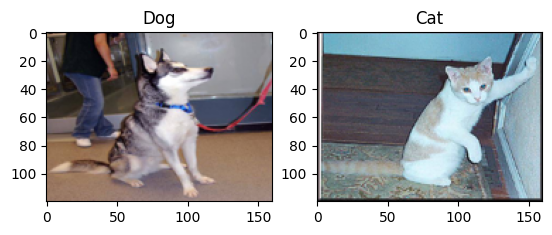

In [274]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
plt.imshow(dog_data[0])
plt.title('Dog')
plt.subplot(1,2,2)
plt.imshow(cat_data[0])
plt.title('Cat')
plt.show()

#####**Build the Labels and Concatenate all the Images**

In [275]:
cat_data_labels=np.ones((cat_data.shape[0],1),dtype='float')

In [276]:
dog_data_labels=np.zeros((dog_data.shape[0],1),dtype='float')

In [277]:
dataset = np.concatenate((cat_data,dog_data), axis=0)
dataset_labels = np.concatenate((cat_data_labels,dog_data_labels), axis=0)

#####**Shuffle the Dataset**

In [278]:
idx = np.random.permutation(len(dataset))
dataset, dataset_labels = dataset[idx], dataset_labels[idx]

#####**See Shuffled Dataset**

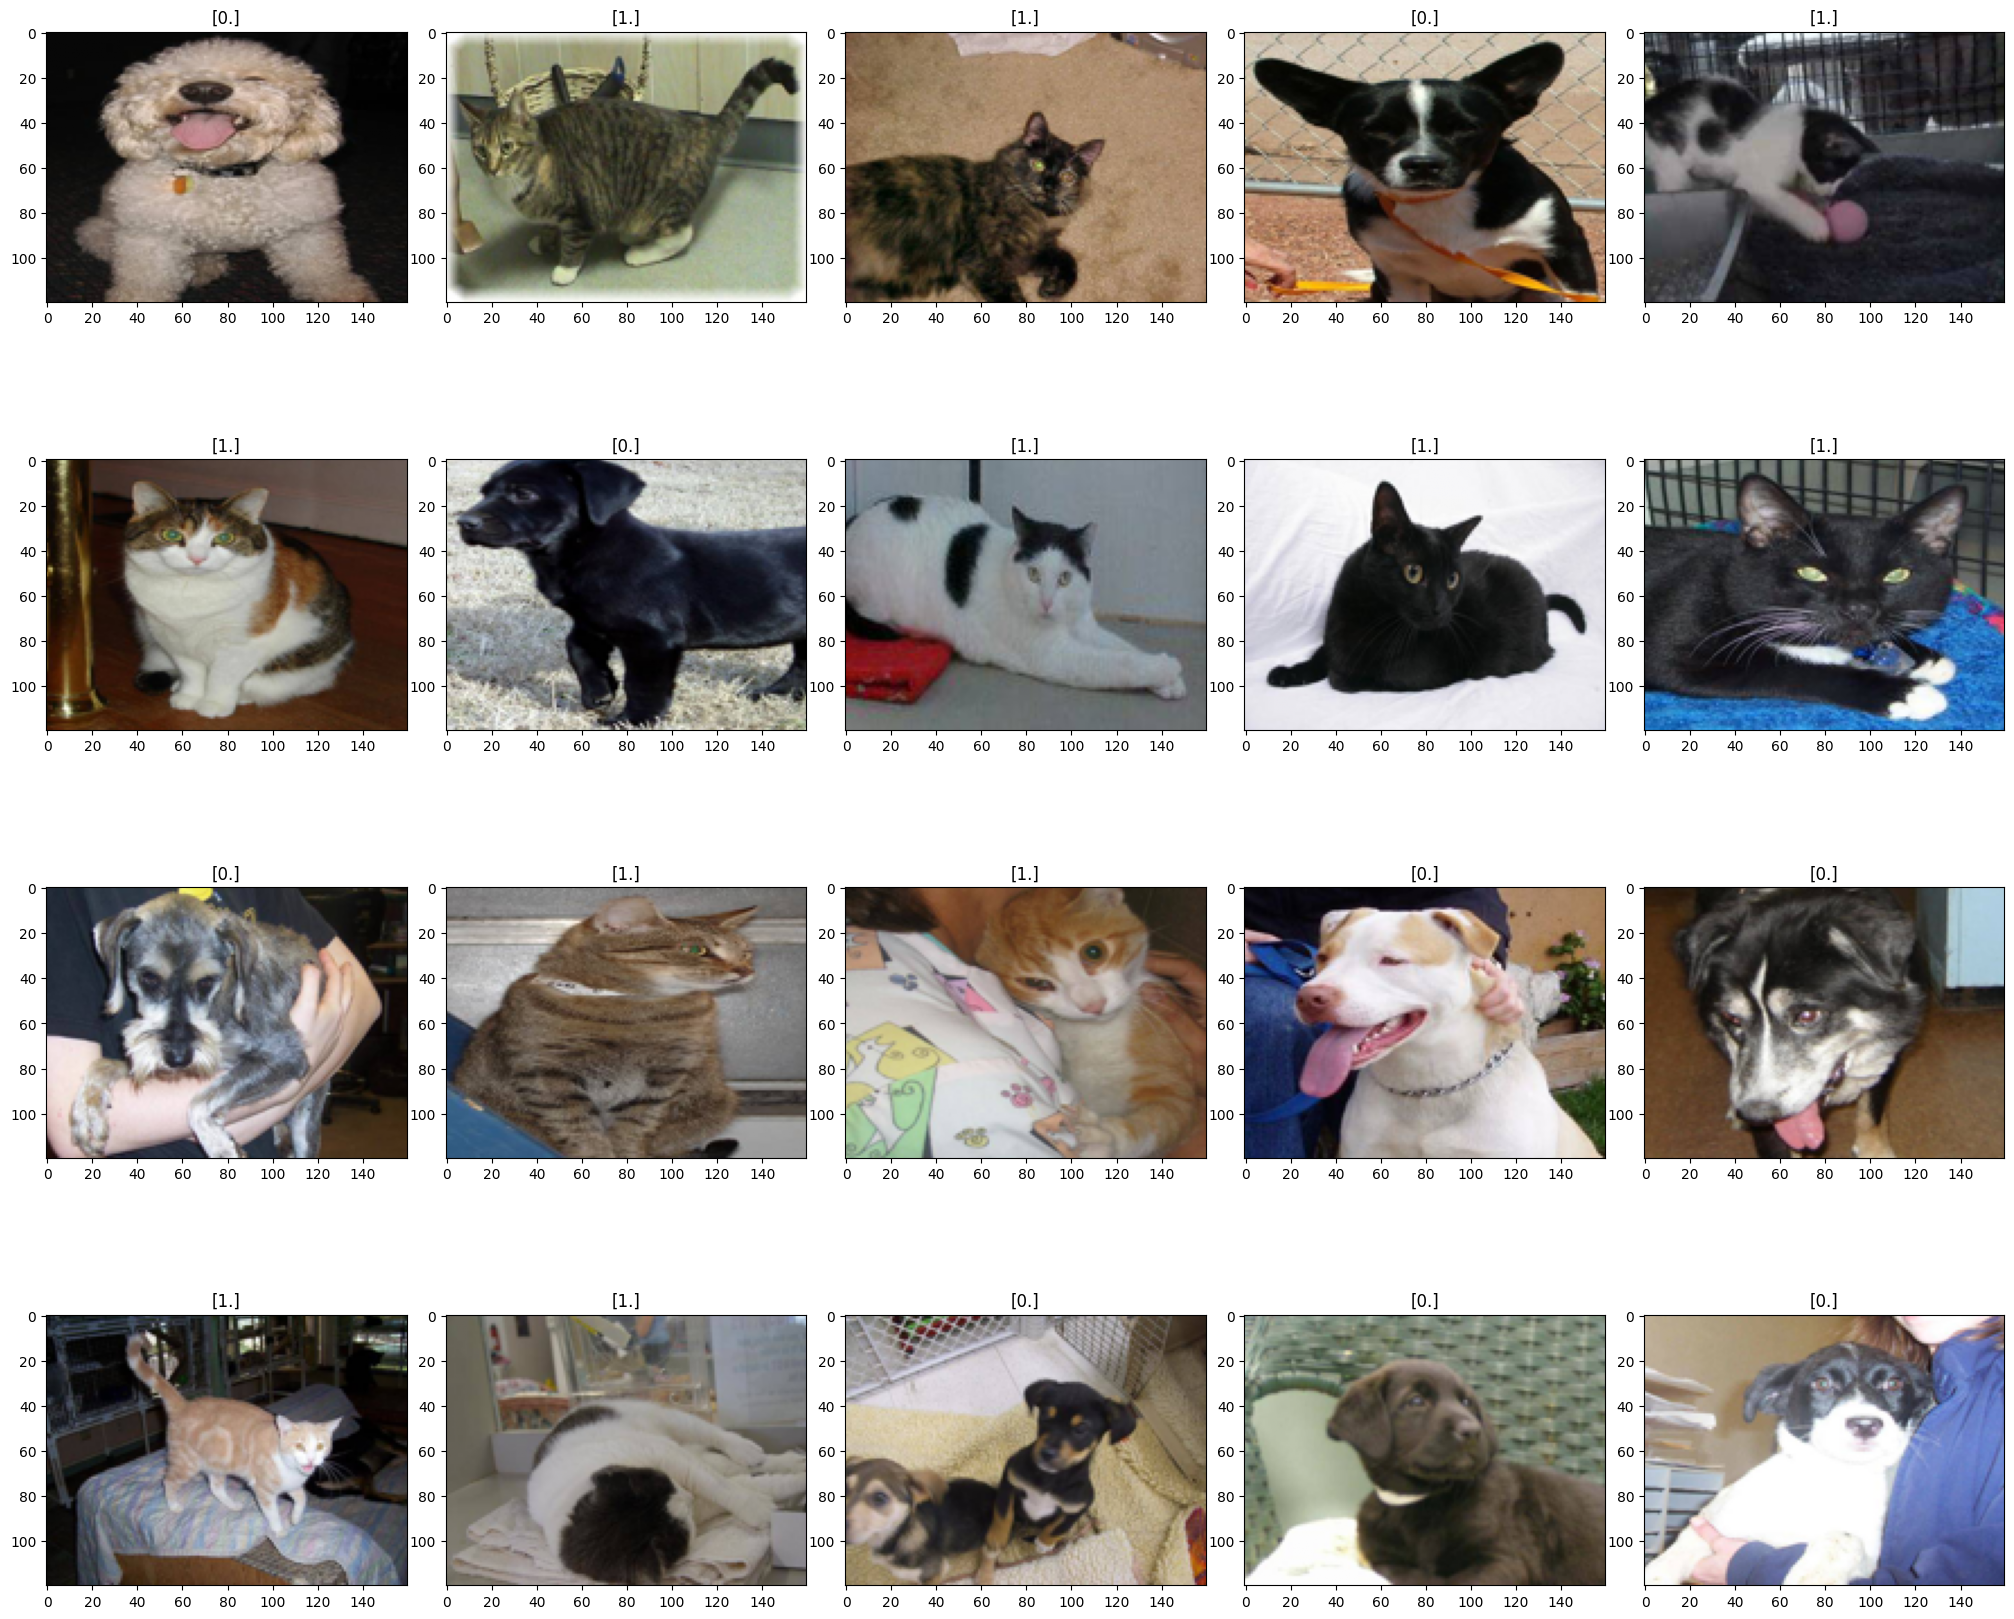

In [279]:
fig = plt.figure(figsize=(20,20))
for i in range(20):
  fig.add_subplot(4,5,i+1)
  plt.imshow(dataset[i,:,:,:])
  plt.title(f'{dataset_labels[i,:]}')
  fig.tight_layout(pad=0.2)
plt.show()

####**Split Dataset into Test and Train**


In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_labels, test_size=0.3, random_state=42)

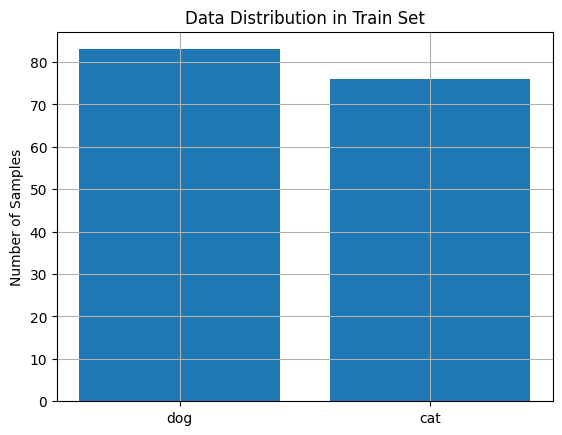

In [281]:
num_class = np.zeros(2)
num_class[0] =len(np.where(y_train==0.)[0])
num_class[1] =len(np.where(y_train==1.)[0])
labels_class = ['dog', 'cat']
plt.figure()
plt.bar(labels_class,num_class)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Train Set')
plt.grid()

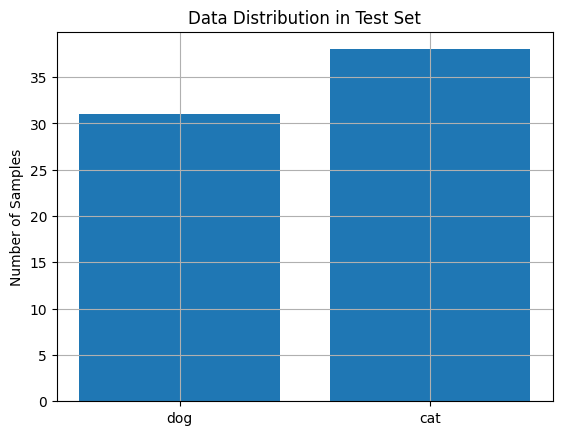

In [282]:
num_class_test = np.zeros(2)
num_class_test[0] =len(np.where(y_test==0.)[0])
num_class_test[1] =len(np.where(y_test==1.)[0])
plt.figure()
plt.bar(labels_class,num_class_test)
plt.ylabel('Number of Samples')
plt.title('Data Distribution in Test Set')
plt.grid()

The data shapes are given below for both train and test datasets.

In [283]:
print(f"The shape train data: {X_train.shape}")
print(f"The shape train labels: {y_train.shape}")
print(f"The shape test data: {X_test.shape}")
print(f"The shape test labels: {y_train.shape}")

The shape train data: (159, 120, 160, 3)
The shape train labels: (159, 1)
The shape test data: (69, 120, 160, 3)
The shape test labels: (159, 1)


As we use a simple L-layer Neural Network and not it is a Convolutional Neural Network, we need to convert the images into a vector (i.e., flattening image data).
(1, 120, 160, 3): image data -> flatten -> (1, 57600)

In [284]:
# Reshape the training and test examples 
train_x_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = X_test.reshape(X_test.shape[0], -1).T

print ("train_x's shape: " + str(train_x_flatten.shape))
print ("test_x's shape: " + str(test_x_flatten.shape))

train_x's shape: (57600, 159)
test_x's shape: (57600, 69)


###**Apply L-Layer Neural Network**

In [285]:
layers_dims = [57600, 20, 7, 5, 1] #  4-layer model
parameters, costs = L_layer_model(train_x_flatten, y_train, layers_dims, learning_rate = 0.0001, num_iterations = 5000, print_cost=True)

Cost after iteration 0: 110.21039017304781
Cost after iteration 100: 110.20962147882513
Cost after iteration 200: 110.20885661962258
Cost after iteration 300: 110.20809557630719
Cost after iteration 400: 110.20733832974321
Cost after iteration 500: 110.20658485872694
Cost after iteration 600: 110.20583514678684
Cost after iteration 700: 110.20508917516844
Cost after iteration 800: 110.20434692521063
Cost after iteration 900: 110.20360837834546
Cost after iteration 1000: 110.20287351609747
Cost after iteration 1100: 110.20214232008324
Cost after iteration 1200: 110.20141477201112
Cost after iteration 1300: 110.20069085368051
Cost after iteration 1400: 110.19997054698169
Cost after iteration 1500: 110.19925383389594
Cost after iteration 1600: 110.19854069414183
Cost after iteration 1700: 110.19783111224713
Cost after iteration 1800: 110.19712507046039
Cost after iteration 1900: 110.19642255111866
Cost after iteration 2000: 110.19572353664704
Cost after iteration 2100: 110.19502800955824


###**Appendix A**
The derivative of cost function with respect to sigmoid function is given below step by step:

$$dA^{[L]} = \frac{\partial J}{\partial a^{[L]}} = \frac{\partial}{\partial a^{[L]}} \left(\frac{1}{m} \sum_{i=1}^m L(\hat{y}^{(i)}, y^{(i)}) \right) \tag{A.1}$$

Using the chain rule, we can expand the derivative as:

$$\frac{\partial J}{\partial a^{[L]}} = \frac{\partial J}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z^{[L]}} \frac{\partial z^{[L]}}{\partial a^{[L]}} \tag{A.2}$$

For the sigmoid activation function, we have:

$$\frac{\partial \hat{y}}{\partial z^{[L]}} = \sigma'(z^{[L]}) = \sigma(z^{[L]}) (1 - \sigma(z^{[L]})) = a^{[L]} (1 - a^{[L]}) \tag{A.3}$$

And for the final layer, we have:

$$z^{[L]} = w^{[L]} a^{[L-1]} + b^{[L]} \tag{A.4}$$

Therefore,

$$\frac{\partial z^{[L]}}{\partial a^{[L]}} = w^{[L]} \tag{A.5}$$

Substituting (A.3) and (A.5) in (A.2), we get:

$$\frac{\partial J}{\partial a^{[L]}} = \frac{1}{m} \sum_{i=1}^m \frac{\partial L(\hat{y}^{(i)}, y^{(i)})}{\partial \hat{y}^{(i)}} a^{[L] (i)} (1 - a^{[L] (i)}) w^{[L]} \tag{A.6}$$

For binary cross-entropy loss function, we have:

$$L(\hat{y}, y) = - \left(y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right) \tag{A.7}$$

Substituting (A.7) in (A.6), we get:

$$\frac{\partial J}{\partial a^{[L]}} = - \frac{1}{m} \sum_{i=1}^m \left(\frac{y^{(i)}}{\hat{y}^{(i)}} - \frac{1 - y^{(i)}}{1 - \hat{y}^{(i)}}\right) a^{[L] (i)} (1 - a^{[L] (i)}) w^{[L]} \tag{A.8}$$

Simplifying (A.8), we get:

$$dA^{[L]} =-\frac{1}{m} \sum\limits_{i = 1}^{m} (\frac{y^{(i)}}{a^{[L] (i)}} - \frac{(1-y^{(i)})} {(1-a^{[L] (i)})}) \tag{A.9}$$